In [4]:
import pandas as pd
import numpy as np
import os
import time
import random
import gensim
import numpy as np
import os
import torch
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

In [37]:
weight = 0.5
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    #print(array.shape)
    array = array.flatten()
    #print(array.shape)
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

def get_mean_vector(model, words):
    # remove out-of-vocabulary words
    # words: target list words
    # returns average vector for all words in target list
    import numpy as np
    words = [word for word in words if word in model.wv.vocab]
    if len(words) >= 1:
        return np.mean(model[words], axis=0)
    else:
        return []

def mdi(mean, gini, weight):
    exp1 =  np.power(mean,weight) 
    exp2 = np.power((1 - gini),1-weight)
    return exp1 * exp2

def get_similarity_Scores(v1,v2):
    from numpy import dot
    from numpy.linalg import norm
    return dot(v1,v2)/(norm(v1)*norm(v2))

def get_similarity_scores_between_target_words_and_attribute_words(model, attribute_words, target_words):
    
    similarity_scores_summary = {}
    words = []
    mean_sim_socres = []

    target_words = [word for word in target_words if word in model.wv.vocab]
    attribute_words = [word for word in attribute_words if word in model.wv.vocab]
    
    if len(target_words) >= 1 and len(attribute_words) >=1:
        for i in target_words:
            similarity_scores = []
            words.append(i)
            for j in attribute_words:
                cos_sim = get_similarity_Scores(model[i], model[j])
                similarity_scores.append(cos_sim)
            mean_sim_socres.append(np.mean(similarity_scores))

    similarity_scores_summary["word"] = words
    similarity_scores_summary["mean_sim_score"] = mean_sim_socres
    return similarity_scores_summary

def get_similarity_scores_between_avergare_target_vector_and_attribute_words(model, att_words, target_vector):
    # remove out-of-vocabulary words
    # att_words: wors in the attribute list
    # target_vector: average vector of all words in target group
    similarity_scores_summary = {}
    words_list = []
    similarity_scores = []
    words = [word for word in att_words if word in model.wv.vocab]
    print(len(words))
    if len(words) >= 1:
        for i in words:
            print(i)
            words_list.append(i)
            cos_sim = get_similarity_Scores(model[i], target_vector)
            similarity_scores.append(cos_sim)
    similarity_scores_summary["words"] = words_list
    similarity_scores_summary["sim_score"] = similarity_scores

    return similarity_scores_summary


## Read profane words

In [6]:
data_folder = "../Data/Hurtlex_data"

In [7]:
profane_words_sample = open(data_folder+"/profane_words_sample.txt").read().splitlines()
profane_words = open(data_folder+"/swear_words.txt").read().splitlines()

In [8]:
len(profane_words)

427

In [19]:
profane_words_sample

['poop',
 'fucks',
 'fanny',
 'horniest',
 'jizz',
 'bitch',
 'phuking',
 'spunk',
 'fuker',
 'faggot',
 'dogfucker',
 'shitter',
 'fucka',
 'cocksucks',
 'dirsa',
 'fuckings',
 'cunts',
 'wse',
 'rimming',
 'ejaculates',
 'mf',
 'masterb',
 'pusse',
 'scrotum',
 'goatse',
 'gangbanged',
 'fuckheads',
 'buceta',
 'queer',
 'fingerfucking',
 'fudgepacker',
 'kums',
 'lusting',
 'scrote',
 'assfukka',
 'shitdick',
 'titfuck',
 'scroat',
 'motherfucker',
 'ejakulate',
 'ugly',
 'ejaculate',
 'motherfuck',
 'asswhole',
 'twatty',
 'niggr',
 'teets',
 'cocksucked',
 'hate',
 'cunt']

## read word embeddings

In [9]:
def get_UD_embeddings(filename):
    UD_model =  gensim.models.KeyedVectors.load_word2vec_format(filename)
    return UD_model

##word similarity

In [ ]:
# convert text to UD
#from gensim.scripts.glove2word2vec import glove2word2vec
#GLOVE_DIR = data_folder+"/glove.6B.300d_WP.txt"
#UD_file = data_folder+"/wv_2_glove.6B.300d_WP.txt"
#glove2word2vec(GLOVE_DIR, UD_file)

In [11]:
UD_model = get_UD_embeddings(data_folder+"/ud_basic.vec")

In [ ]:
[i[0] for i in UD_model.wv.similar_by_word(word='immigrant',topn=10)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


['immigrants',
 'criminalien',
 'mexiscum',
 'immigration',
 'venesday',
 'scratchback',
 'sandbaby',
 'spickbitch',
 'trespacito',
 'illiegal']

In [ ]:
[i[0] for i in UD_model.wv.similar_by_word(word='citizen',topn=10)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


['citizens',
 'screenior',
 'second-class',
 'sitizen',
 'super-citizen',
 'shitizen',
 'awareican',
 'memmingen',
 'billboardom',
 'citzen']

In [ ]:
[i[0] for i in UD_model.wv.similar_by_word(word='negative',topn=10)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


['positive',
 'negatude',
 'negnance',
 'negatitude',
 'nottism',
 'yegative',
 'negatively',
 'negetive',
 'rectermemring',
 'connotation']

## get similarity scores between target words and profance words

In [35]:
bad_wors = ["unpleasant"]

target_words = ["women","africans","americans","europeans","homosexuals","gays","muslims","christians","jews","arabs","asians"]

sim_dict = get_similarity_scores_between_target_words_and_attribute_words(UD_model,profane_words,target_words)

pd.DataFrame(sim_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


,word,mean_sim_score
0,women,0.174133
1,africans,0.114929
2,americans,0.126408
3,europeans,0.116646
4,homosexuals,0.160747
5,gays,0.164683
6,muslims,0.115975
7,christians,0.119733
8,jews,0.136608
9,arabs,0.127897


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


(array([  39.,  663., 1784.,  911.,  312.,  138.,   46.,   16.,    5.,
           2.]),
 array([-0.06294301,  0.0057809 ,  0.07450481,  0.14322871,  0.21195263,
         0.28067654,  0.34940043,  0.41812435,  0.48684826,  0.55557215,
         0.62429607], dtype=float32),
 <a list of 10 Patch objects>)

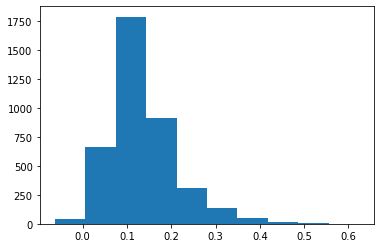

In [33]:
target_words = [word for word in target_words if word in UD_model.wv.vocab]
attribute_words = [word for word in profane_words if word in UD_model.wv.vocab]
sim = []
if len(target_words) >= 1 and len(attribute_words) >=1:
    for i in target_words:
        for j in attribute_words:
            cos_sim = get_similarity_Scores(UD_model[i], UD_model[j])
            sim.append(cos_sim)

plt.hist(sim)            

In [74]:
target_words = ["queer","black","jew","muslim","feminist","woman","faggot", "nigger", "jewboy","terrorist", "turban", "feminazi","ugly", "bitch"]

In [75]:
profane_vector = get_mean_vector(UD_model, profane_words)
vec_sim_dict = get_similarity_scores_between_avergare_target_vector_and_attribute_words(UD_model, target_words, profane_vector)
pd.DataFrame(vec_sim_dict)

14
queer
black
jew
muslim
feminist
woman
faggot
nigger
jewboy
terrorist
turban
feminazi
ugly
bitch


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


,words,sim_score
0,queer,0.446398
1,black,0.365282
2,jew,0.387954
3,muslim,0.276838
4,feminist,0.302191
5,woman,0.425833
6,faggot,0.580353
7,nigger,0.473608
8,jewboy,0.427462
9,terrorist,0.330783


In [76]:

sim_dict = get_similarity_scores_between_target_words_and_attribute_words(UD_model,profane_words,target_words)

pd.DataFrame(sim_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


,word,mean_sim_score
0,queer,0.193629
1,black,0.162626
2,jew,0.169035
3,muslim,0.120487
4,feminist,0.132757
5,woman,0.189027
6,faggot,0.254338
7,nigger,0.207616
8,jewboy,0.184750
9,terrorist,0.143611


In [ ]:
for i in profane_words_sample:  
  if i in UD_model.wv.vocab:
    print({i:UD_model.wv.similar_by_word(word=i,topn=10)})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


{'poop': [('poo', 0.7912976741790771), ('feces', 0.7331807613372803), ('poopoloop', 0.7193753719329834), ('poobarf', 0.7129543423652649), ('pooppy', 0.6915205717086792), ('brownsnake', 0.6914210319519043), ('poocake', 0.6912588477134705), ('poopling', 0.689521074295044), ('dookee', 0.6887068748474121), ('poopy', 0.6869628429412842)]}
{'fucks': [('clickerjack', 0.5713415145874023), ('sheepfinger', 0.568133533000946), ('cuntbanger', 0.550475001335144), ('wombro', 0.5501642227172852), ('fuck', 0.5433267951011658), ('sterba', 0.5324728488922119), ('coon-fucker', 0.5262523889541626), ('zuniyah', 0.525053858757019), ('bitch-fucker', 0.5204444527626038), ('fuckpod', 0.5203980207443237)]}
{'fanny': [('efnay', 0.668262779712677), ('fadge', 0.6681931018829346), ('minge', 0.6620196104049683), ('fudface', 0.6150482892990112), ('fannybum', 0.6094961166381836), ('punashum', 0.6061083674430847), ('mingepiece', 0.604970395565033), ('flange', 0.6043585538864136), ('fanjeeta', 0.6033763885498047), ('fla

In [ ]:
c = 0
for i in profane_words:  
  if i in UD_model.wv.vocab:
    c = c+1

print(c)

356


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


## semantic similariy scores

In [ ]:
hurtlex = pd.read_csv(data_folder+"/Hurtlex.tsv", sep="\t")
hurtlext_train = pd.read_csv(data_folder+"/hurtlex_train.csv")
hurtlext_test = pd.read_csv(data_folder+"/hurtlex_test.csv")

In [ ]:
def find_lexicon_in_WE_vocab(lexicon_word_lst, we_model):
  slur_words_in_WE_vocab = []
  for i in lexicon_word_lst:  
    if i in we_model.wv.vocab:
      slur_words_in_WE_vocab.append(i)
  return slur_words_in_WE_vocab    

In [ ]:
def return_WE_vocab_in_hurtlext_ds (hurtlex_df, word_EM):
  print(hurtlex_df.columns)
  hurtlex_df_ps = hurtlex_df[(hurtlex_df["category"] == "ps")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "yes")]
  hurtlex_df_om = hurtlex_df[(hurtlex_df["category"] == "om")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_qas = hurtlex_df[(hurtlex_df["category"] == "qas")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_cds = hurtlex_df[(hurtlex_df["category"] == "cds")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_is = hurtlex_df[(hurtlex_df["category"] == "is")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_re = hurtlex_df[(hurtlex_df["category"] == "re")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_pr = hurtlex_df[(hurtlex_df["category"] == "pr")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_asf = hurtlex_df[(hurtlex_df["category"] == "asf")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_asm = hurtlex_df[(hurtlex_df["category"] == "asm")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_ddp = hurtlex_df[(hurtlex_df["category"] == "ddp")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "yes")]
  hurtlex_df_ddf = hurtlex_df[(hurtlex_df["category"] == "ddf")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "yes")]

  ps_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_ps, word_EM)
  om_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_om, word_EM)
  qas_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_qas, word_EM)
  cds_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_cds, word_EM)
  is_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_is, word_EM)
  re_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_re, word_EM)
  pr_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_pr, word_EM)
  asf_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_asf, word_EM)
  asm_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_asm, word_EM)
  ddp_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_ddp, word_EM)
  ddf_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_ddf, word_EM)

  ps_labels = ["ps" for i in ps_slur_words_in_UD]
  om_labels = ["om" for i in om_slur_words_in_UD]
  qas_labels = ["qas" for i in qas_slur_words_in_UD]
  cds_labels = ["cds" for i in cds_slur_words_in_UD]
  is_labels = ["is" for i in is_slur_words_in_UD]
  re_labels = ["re" for i in re_slur_words_in_UD]
  pr_labels = ["pr" for i in pr_slur_words_in_UD]
  asf_labels = ["asf" for i in asf_slur_words_in_UD]
  asm_labels = ["asm" for i in asm_slur_words_in_UD]
  ddp_labels = ["ddp" for i in ddp_slur_words_in_UD]
  ddf_labels = ["ddf" for i in ddf_slur_words_in_UD]

  ps_target = [0 for i in ps_slur_words_in_UD]
  om_target = [1 for i in om_slur_words_in_UD]
  qas_target = [2 for i in qas_slur_words_in_UD]
  cds_target = [3 for i in cds_slur_words_in_UD]
  is_target = [4 for i in is_slur_words_in_UD]
  re_target = [5 for i in re_slur_words_in_UD]
  pr_target = [6 for i in pr_slur_words_in_UD]
  asf_target = [7 for i in asf_slur_words_in_UD]
  asm_target = [8 for i in asm_slur_words_in_UD]
  ddp_target = [9 for i in ddp_slur_words_in_UD]
  ddf_target = [10 for i in ddf_slur_words_in_UD]


  hurt_lex_dic = {"label":ps_labels + om_labels + qas_labels + cds_labels + is_labels + re_labels + pr_labels + asf_labels + asm_labels + ddp_labels + ddf_labels,
                  "target":ps_target + om_target + qas_target + cds_target + is_target + re_target + pr_target+ asf_target + asm_target + ddp_target + ddf_target,
                  "words":ps_slur_words_in_UD + om_slur_words_in_UD + qas_slur_words_in_UD + cds_slur_words_in_UD + is_slur_words_in_UD + re_slur_words_in_UD + pr_slur_words_in_UD + asf_slur_words_in_UD + asm_slur_words_in_UD + ddp_slur_words_in_UD + ddf_slur_words_in_UD}


  return pd.DataFrame.from_dict(hurt_lex_dic)

In [ ]:
hurtlex_new_df = return_WE_vocab_in_hurtlext_ds(hurtlex, UD_model)
hurtlex_train = return_WE_vocab_in_hurtlext_ds(hurtlext_train, UD_model)
hurtlex_test = return_WE_vocab_in_hurtlext_ds(hurtlext_test, UD_model)

Index(['id', 'pos', 'category', 'stereotype', 'lemma', 'level'], dtype='object')
Index(['Unnamed: 0', 'id', 'pos', 'category', 'stereotype', 'lemma', 'level'], dtype='object')
Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'pos', 'category', 'stereotype',
       'lemma', 'level'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [ ]:
len(hurtlex_new_df)//11

270

In [ ]:
hurtlex_new_df[hurtlex_new_df.label=="cds"]

,label,target,words
682,cds,3,snotty
683,cds,3,nerdiness
684,cds,3,ponce
685,cds,3,prate
686,cds,3,muthafucker
...,...,...,...
1754,cds,3,strikebreaker
1755,cds,3,rustler
1756,cds,3,faction
1757,cds,3,patsy


In [ ]:
hurtlex_new_df.columns

Index(['label', 'target', 'words'], dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


,word,mean_sim_score
0,woman,0.264442
1,man,0.114209
2,african,0.173335
3,african-american,0.033477
4,africanamerican,0.110641
5,white,0.141180
6,black,0.122397
7,american,0.114915
8,european,0.094637
9,straight,0.078688


## Clustering train and test set

In [ ]:
X_train= UD_model[hurtlex_train.words]
X_test = UD_model[hurtlex_test.words]
y_train = hurtlex_train.target
y_test = hurtlex_test.target

In [ ]:
X_train.shape

(2158, 300)

## KMEANS evaluation metrics with grounf truth

In [ ]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

clusterer = KMeans(n_clusters=11).fit(UD_model[hurtlex_new_df.words])
cluster_labels = clusterer.predict(X_test)
print("Weighted F1-score", metrics.f1_score(y_test,cluster_labels,average=None))
print("Blanaced accuracy",metrics.balanced_accuracy_score(y_test,cluster_labels))
print("accuracy",metrics.accuracy_score(y_test,cluster_labels))
print("Fowlkes Mallows",metrics.fowlkes_mallows_score(y_test,cluster_labels))
print("harmonic mean",metrics.v_measure_score(y_test,cluster_labels))
print("Mutual Information based scores",metrics.adjusted_mutual_info_score(y_test,cluster_labels))
print("Rand Index",metrics.adjusted_rand_score(y_test,cluster_labels))
print("Purity score",purity_score(y_test,cluster_labels))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, cluster_labels))

              precision    recall  f1-score   support

           0       0.08      0.13      0.10        55
           1       0.00      0.00      0.00        45
           2       0.16      0.14      0.15        98
           3       0.00      0.00      0.00       368
           4       0.00      0.00      0.00        28
           5       0.02      0.03      0.03       104
           6       0.62      0.72      0.67        36
           7       0.01      0.06      0.02        35
           8       0.03      0.05      0.04        75
           9       0.07      0.16      0.10        94
          10       0.00      0.00      0.00        16

    accuracy                           0.07       954
   macro avg       0.09      0.12      0.10       954
weighted avg       0.06      0.07      0.06       954



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN with evaluation metrics using GT

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11,weights='distance').fit(X_train, y_train)

predictions = knn.predict(X_test)
print("Weighted F1-score", metrics.f1_score(y_test,predictions,average=None))
print("Blanaced accuracy",metrics.balanced_accuracy_score(y_test,predictions))
print("accuracy",metrics.accuracy_score(y_test,predictions))
print("Fowlkes Mallows",metrics.fowlkes_mallows_score(y_test,predictions))
print("harmonic mean",metrics.v_measure_score(y_test,predictions))
print("Mutual Information based scores",metrics.adjusted_mutual_info_score(y_test,predictions))
print("Rand Index",metrics.adjusted_rand_score(y_test,predictions))
print("Purity score",purity_score(y_test,predictions))

Weighted F1-score [0.34246575 0.72       0.12413793 0.59429825 0.14634146 0.28571429
 0.76190476 0.19672131 0.36363636 0.23448276 0.31578947]
Blanaced accuracy 0.34287643654926236
accuracy 0.4549266247379455
Fowlkes Mallows 0.383728250744527
harmonic mean 0.21909040542633088
Mutual Information based scores 0.19409718185533478
Rand Index 0.15600013856833267
Purity score 0.46645702306079667


In [ ]:
hurtlex_test["ud_precitions"] = predictions
hurtlex_test.to_csv(data_folder+"/ud_hurtlex.csv")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.27      0.45      0.34        55
           1       0.90      0.60      0.72        45
           2       0.19      0.09      0.12        98
           3       0.50      0.74      0.59       368
           4       0.23      0.11      0.15        28
           5       0.49      0.20      0.29       104
           6       0.89      0.67      0.76        36
           7       0.23      0.17      0.20        35
           8       0.35      0.37      0.36        75
           9       0.33      0.18      0.23        94
          10       1.00      0.19      0.32        16

    accuracy                           0.45       954
   macro avg       0.49      0.34      0.37       954
weighted avg       0.45      0.45      0.42       954



In [ ]:
ps_predictions = knn.predict(UD_model[hurtlex_test[hurtlex_test["label"]=="ps"].words])
om_predictions = knn.predict(UD_model[hurtlex_test[hurtlex_test["label"]=="om"].words])
qas_predictions = knn.predict( UD_model[hurtlex_test[hurtlex_test["label"]=="qas"].words])
cds_predictions = knn.predict(UD_model[hurtlex_test[hurtlex_test["label"]=="cds"].words])
is_predictions = knn.predict(UD_model[hurtlex_test[hurtlex_test["label"]=="is"].words])
re_predictions = knn.predict(UD_model[hurtlex_test[hurtlex_test["label"]=="re"].words])
pr_predictions = knn.predict(UD_model[hurtlex_test[hurtlex_test["label"]=="pr"].words])
asf_predictions = knn.predict(UD_model[hurtlex_test[hurtlex_test["label"]=="asf"].words])
asm_predictions = knn.predict(UD_model[hurtlex_test[hurtlex_test["label"]=="asm"].words])
ddp_predictions = knn.predict(UD_model[hurtlex_test[hurtlex_test["label"]=="ddp"].words])
ddf_predictions = knn.predict(UD_model[hurtlex_test[hurtlex_test["label"]=="ddf"].words])

In [ ]:
fowlkes_mallows_score_cat = [metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="ps"].target,ps_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="om"].target,om_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="qas"].target,qas_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="cds"].target,cds_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="is"].target,is_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="re"].target,re_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="pr"].target,pr_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="asf"].target,asf_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="asm"].target,asm_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="ddp"].target,ddp_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="ddf"].target,ddf_predictions)]

In [ ]:
fowlkes_mallows_score_cat

[0.5595813731096785,
 0.6490085679034763,
 0.6954814941688439,
 0.7431119547719317,
 0.6900655593423543,
 0.7210947200058488,
 0.7248426211232514,
 0.4120047319627092,
 0.47798375335200305,
 0.508225635646646,
 0.695221787153807]

In [ ]:
harmonic_mean_score_cat = [metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="ps"].target,ps_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="om"].target,om_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="qas"].target,qas_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="cds"].target,cds_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="is"].target,is_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="re"].target,re_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="pr"].target,pr_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="asf"].target,asf_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="asm"].target,asm_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="ddp"].target,ddp_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="ddf"].target,ddf_predictions)]

In [ ]:
harmonic_mean_score_cat

[4.835473362843597e-16,
 -2.8552215821955835e-16,
 1.4534060078715602e-15,
 1.6623761952421445e-16,
 -5.450596130531028e-16,
 -1.507682545331326e-15,
 7.582183790641705e-16,
 -3.0855762749257545e-16,
 -5.413435882522063e-16,
 -1.8350909704031055e-16,
 7.255996695444944e-16]

In [ ]:
purity_score_cat = [purity_score(hurtlex_test[hurtlex_test["label"]=="ps"].target,ps_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="om"].target,om_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="qas"].target,qas_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="cds"].target,cds_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="is"].target,is_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="re"].target,re_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="pr"].target,pr_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="asf"].target,asf_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="asm"].target,asm_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="ddp"].target,ddp_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="ddf"].target,ddf_predictions)]

In [ ]:
purity_score_cat

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

## TSNE of all the word embeddings of hurtlex df new

In [ ]:
images_folder = "/content/drive/My Drive/Colab Notebooks/Cyberbullying_WE_intrinsic_analysis/images"

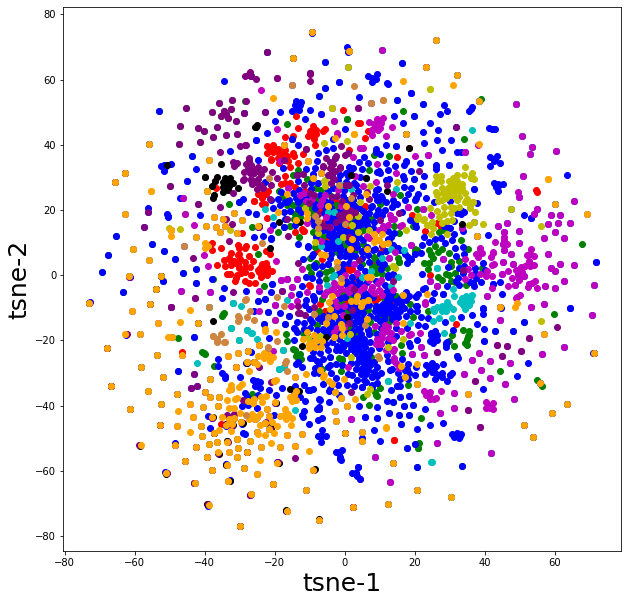

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

X_2d = tsne.fit_transform(UD_model[hurtlex_new_df.words])

target_ids = range(1,len(hurtlex_new_df.label))


fig = plt.figure(figsize=(10,10))
colors = 'r', 'g', 'b', 'c', 'm', 'y','k','purple', 'orange','peru','lime',
for i, c, l in zip(target_ids, colors, hurtlex_new_df.label.unique()):
    plt.scatter(X_2d[hurtlex_new_df.target == i, 0], X_2d[hurtlex_new_df.target == i, 1], c=c, label=l)
    #plt.title("Distribution of Word2Vec-News embeddings of the words in different cateogries in the Hurtlex offensive lexicon", fontsize=14)
    plt.xlabel("tsne-1", fontsize=25)
    plt.ylabel("tsne-2", fontsize=25)

#plt.legend(bbox_to_anchor=(1., 1.03),fontsize=25)

fig.savefig(images_folder+"/UD_tsne.eps", format='eps',bbox_inches='tight')            

## Silhoutte score

In [ ]:
metrics.silhouette_score(X_2d, hurtlex_df.label, metric='euclidean')

-0.2161958

In [ ]:
sample_silhouette_values = metrics.silhouette_samples(X_2d, hurtlex_df.target)
for i in range(11):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[hurtlex_df.target == i]
    print(hurtlex_df.label.unique()[i],np.mean(ith_cluster_silhouette_values))

ps -0.3567972
om 0.1038715
qas -0.31470364
cds -0.27856743
is -0.14023831
re -0.18142806
pr 0.23462339
asf -0.25236794
asm -0.3281396
ddp -0.14282311
ddf 0.026817545


In [ ]:
def plot_silhouette_clusters(X_2d, cluster_labels_num,cluster_labels_str,range_n_clusters):
  import matplotlib.cm as cm
  from sklearn import metrics
  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(X_2d) + (n_clusters + 1) * 10])
      silhouette_avg = metrics.silhouette_score(X_2d, cluster_labels_num)
      print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

      # Compute the silhouette scores for each sample
      sample_silhouette_values = metrics.silhouette_samples(X_2d, cluster_labels_num)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = \
              sample_silhouette_values[cluster_labels_num == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.005, y_lower + 0.5 * size_cluster_i, cluster_labels_str[i],fontsize=14, fontweight='bold')

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      #ax1.set_title("The silhouette plot for the various clusters.", fontsize=18)
      ax1.set_xlabel("The silhouette coefficient values",fontsize=18)
      ax1.set_ylabel("Cluster label", fontsize=18)

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.8,-0.6,-0.4,-0.2, 0, 0.2, 0.4,0.6,0.8])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels_num.astype(float) / n_clusters)
      ax2.scatter(X_2d[:, 0], X_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                  c=colors, edgecolor='k')
      # Labeling the clusters
     #centers = clusterer.cluster_centers_
      # Draw white circles at cluster centers
      #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                #  c="white", alpha=1, s=200, edgecolor='k')

     # for i, c in enumerate(centers):
      #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
       #               s=50, edgecolor='k')

      #ax2.set_title("The visualization of the clustered data.", fontsize=18)
      ax2.set_xlabel("Feature space for the 1st feature", fontsize=18)
      ax2.set_ylabel("Feature space for the 2nd feature", fontsize=18)

      #plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                 #   "with n_clusters = %d" % n_clusters),
                  #fontsize=18, fontweight='bold')
  return plt

plt = plot_silhouette_clusters(X_2d, hurtlex_df.target, hurtlex_df.label.unique(),[11])
plt.savefig(images_folder+"/UD_silhoutte_clusters.eps", format='eps',bbox_inches='tight')     


For n_clusters = 11 The average silhouette_score is : -0.2161958


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

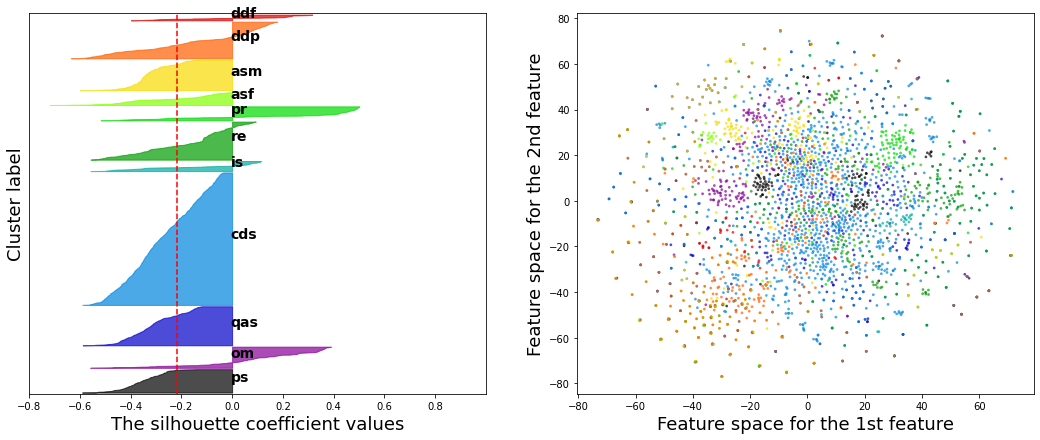

In [ ]:
plot_silhouette_clusters(X_2d, hurtlex_df.target, hurtlex_df.label.unique(),[11])

In [ ]:
for i in hurtlex_df[hurtlex_df["label"]=="om"]["words"]:
  print(i)

buttfucker
assplay
tooshie
tail
posteriorly
buttcheeks
homoeroticism
bottom
homophilia
homosexual
crossdressing
fag
gentlelady
assfuck
gaymen
caudal
transvestites
sodomise
homophilic
underparts
ghey
inferiorly
can
hindquarters
queerio
faggy
medial
dorsal
unnatural
poof
hiney
buggering
frontal
buns
buttsecks
queerness
bum
finocchio
abnormal
homosexuality
buttsex
fudgepacking
butt
chicken
faggotry
fayg
homo
gaynal
arse
sodomizing
tush
faggot
dame
homophile
namby-pamby
pederast
queer
pansy
buttfuck
hindquarter
homosexuals
poofster
bumsex
fagot
stern
pederastic
sodomist
bumsecks
superior
cross-dressing
sodomised
gayness
transvestism
gays
buttocks
crossdresses
ma'am
faggoty
keister
twinkie
deviant
buttucks
plantar
noblewoman
mme
deviate
pidor
posterior
gentlewoman
gayest
rump
nates
crossdresser
buttock
donkey
asscheeks
different
poofy
bumfuck
frau
poofter
fairy
inferior
madam
crossdressers
buttcheek
shirtlifter
tuches
badonkadonk
assfucking
fagala
pederasty
shman
twink
homosexualist
transve

## Clustering the embeddings using KNN (hurtlext words that are found in the embedding)

For n_clusters = 3 The average silhouette_score is : 0.36954442


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


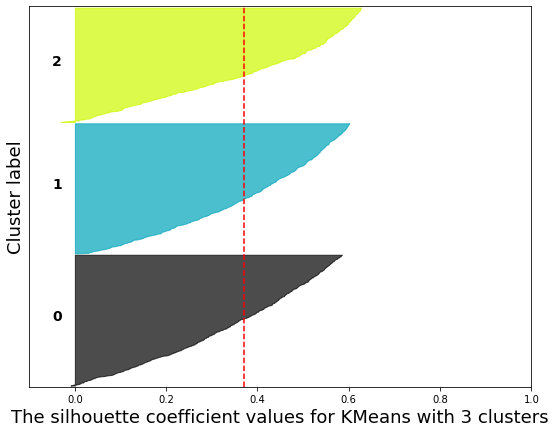

In [ ]:
def plot_silhouette_KNN_clusters(X,range_n_clusters):
  import matplotlib.cm as cm
  from sklearn import metrics
  from sklearn.cluster import KMeans
  from sklearn.metrics import silhouette_samples, silhouette_score

  for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(9, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i),fontsize=14, fontweight='bold')

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values for KMeans with 3 clusters", fontsize=18)
    ax1.set_ylabel("Cluster label", fontsize=18)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([ 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
   # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
           #     c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
  #  ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
          #      c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
        #ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
              #      s=50, edgecolor='k')
#
    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature", fontsize=18)
    #ax2.set_ylabel("Feature space for the 2nd feature", fontsize=18)

    #plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
            #      "with n_clusters = %d" % n_clusters),
             #    fontsize=14, fontweight='bold')
    return plt

plot_silhouette_KNN_clusters(X_2d,[3])
plt.savefig(images_folder+"/UD_silhoutte_clusters_Kmeans_3.eps", format='eps',bbox_inches='tight') 

For n_clusters = 2 The average silhouette_score is : 0.3470701
For n_clusters = 3 The average silhouette_score is : 0.36954442
For n_clusters = 4 The average silhouette_score is : 0.35589302
For n_clusters = 5 The average silhouette_score is : 0.33649802
For n_clusters = 6 The average silhouette_score is : 0.3512107
For n_clusters = 7 The average silhouette_score is : 0.34619403
For n_clusters = 8 The average silhouette_score is : 0.3496203
For n_clusters = 9 The average silhouette_score is : 0.34388867
For n_clusters = 10 The average silhouette_score is : 0.34079257
For n_clusters = 11 The average silhouette_score is : 0.34207556


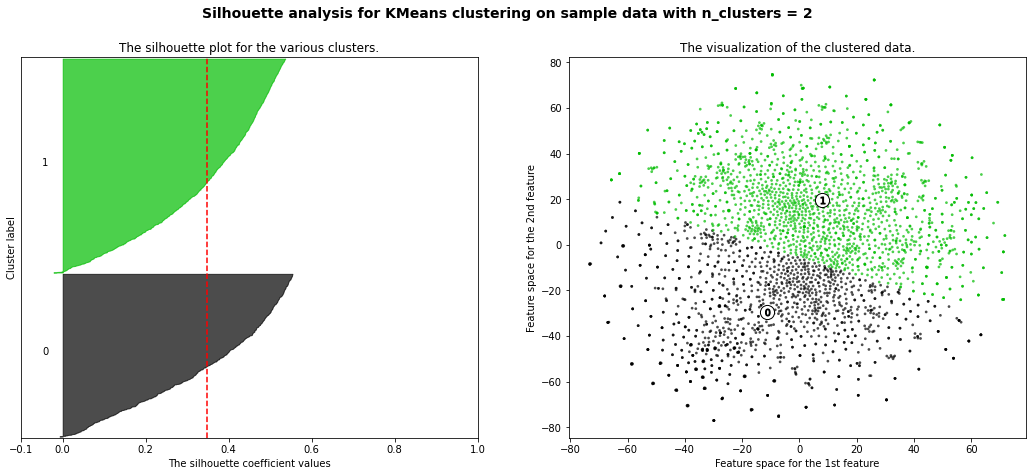

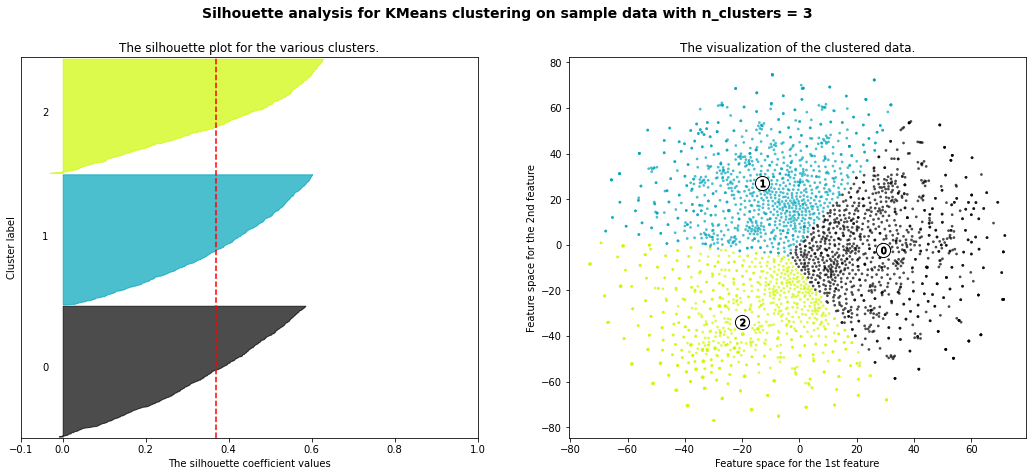

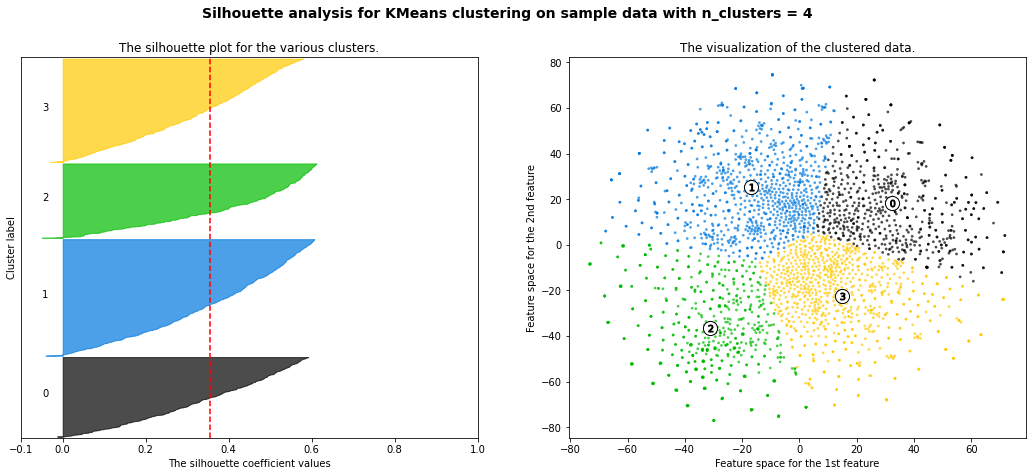

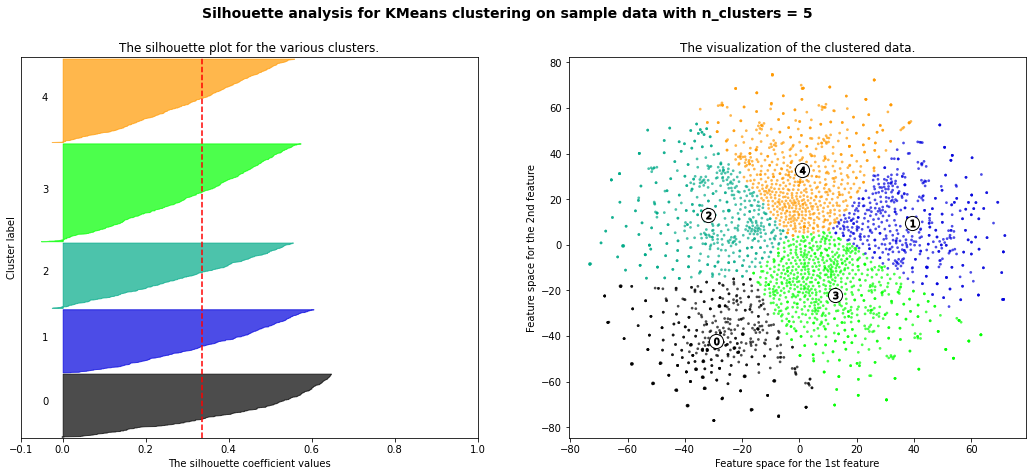

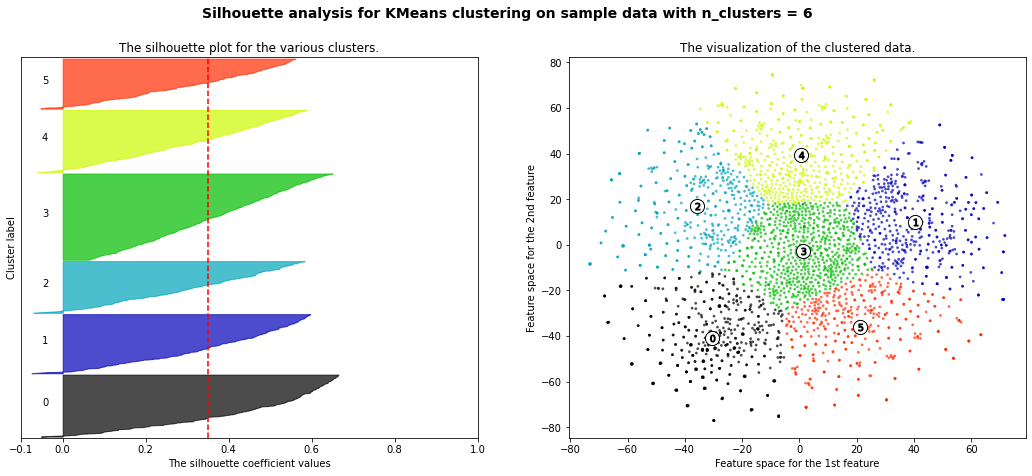

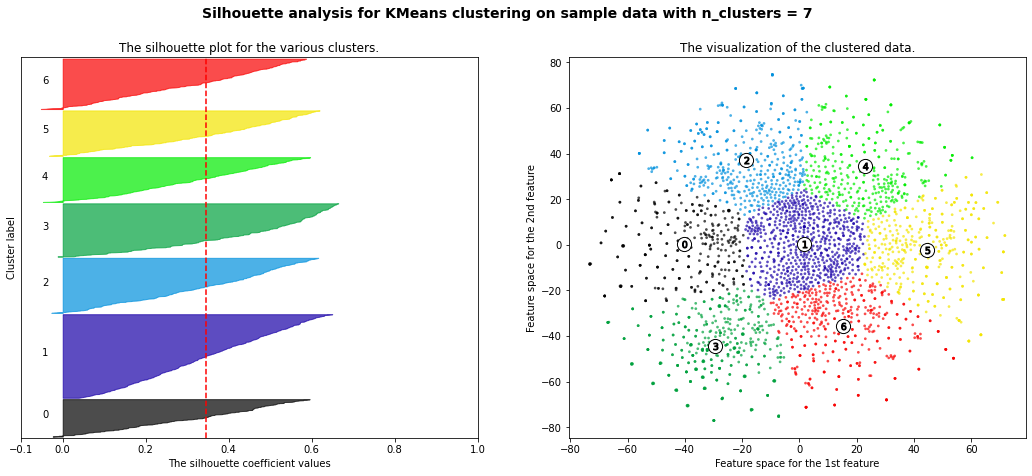

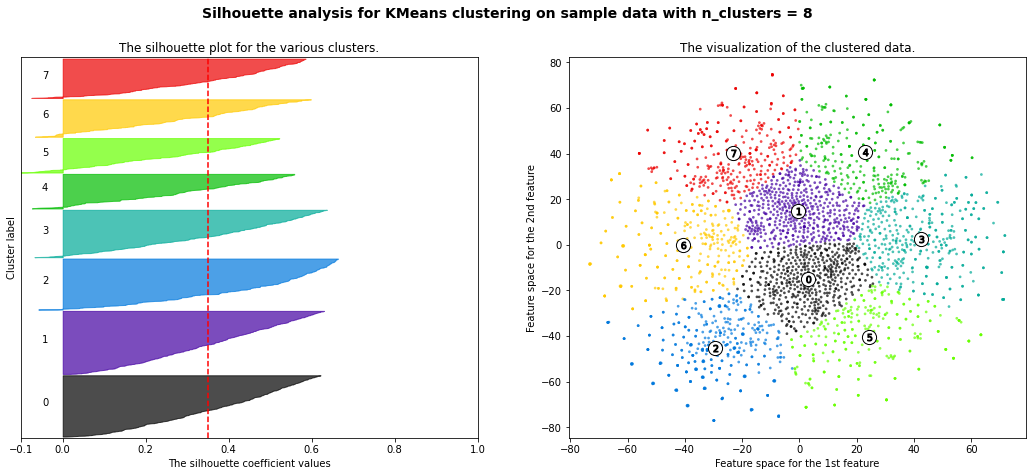

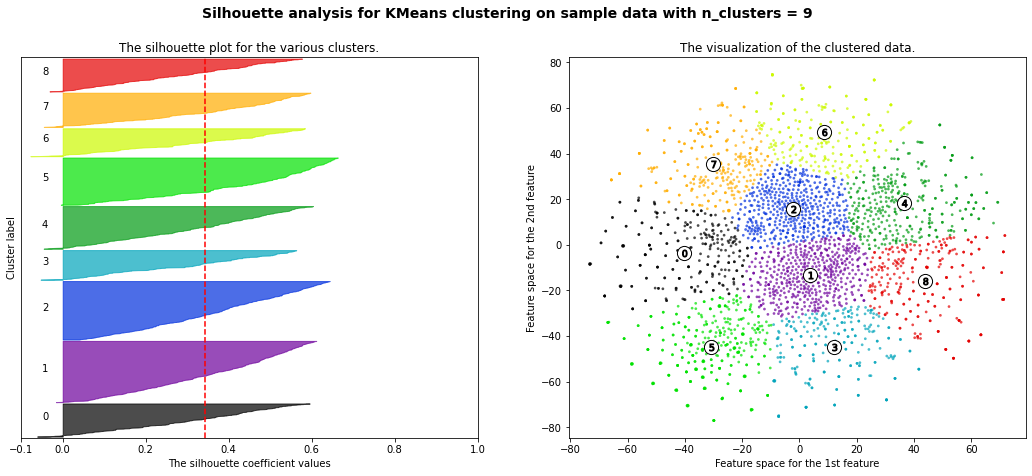

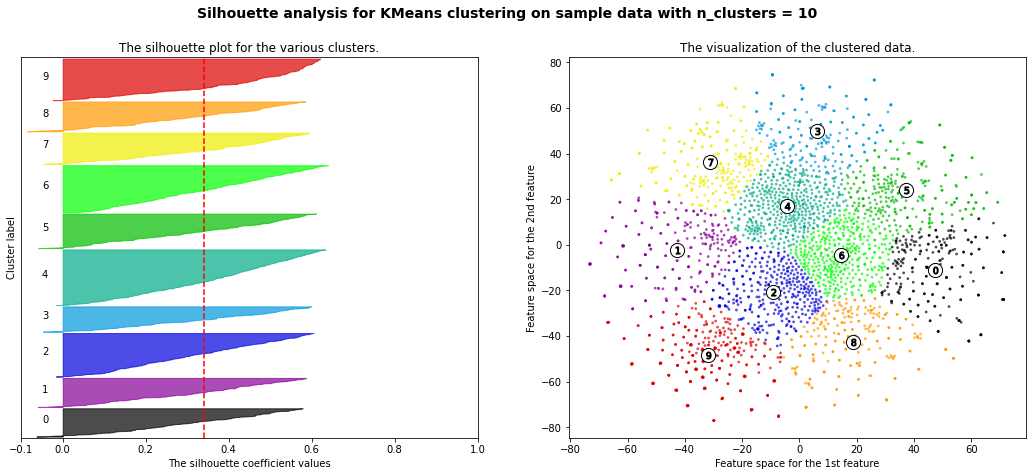

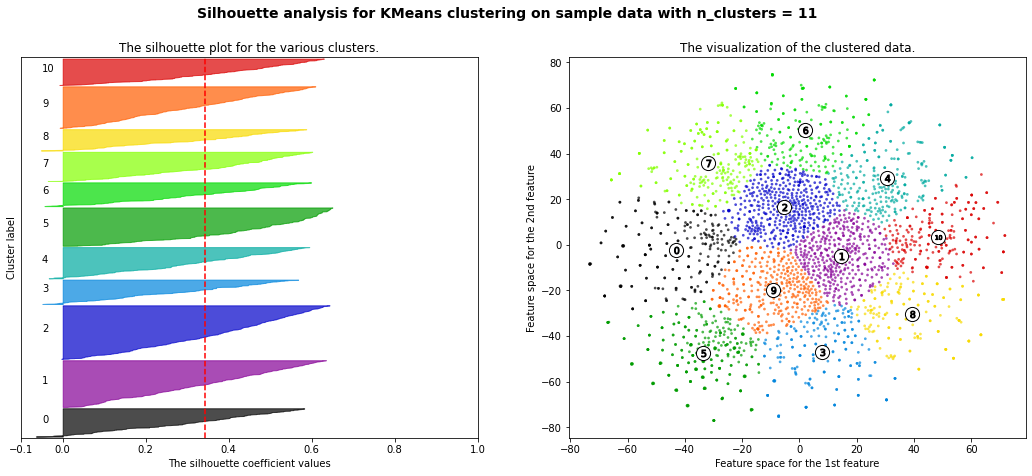

## Similarity scores

In [ ]:
def hurt_lex_category_similarities(words_list, model,category,ax):
  from itertools import combinations
  ps_all_pairs = combinations(words_list, 2)  
  ps_scored_pairs = [(model.wv.similarity(p[0], p[1]), p)
                for p in ps_all_pairs]
  ps_sorted_pairs = sorted(ps_scored_pairs, reverse=True)
  ps_similairty_scores = []
  for i in ps_sorted_pairs:
    ps_similairty_scores.append(i[0])
  print(np.mean(ps_similairty_scores))
  ax.hist(ps_similairty_scores)  
  ax.set_title(category)

In [ ]:
fig, axs = plt.subplots(figsize=(25,5),ncols=11)
hurt_lex_category_similarities(ps_slur_words_in_UD, UD_model, "PS", axs[0])
hurt_lex_category_similarities(om_slur_words_in_UD, UD_model, "OM", axs[1])
hurt_lex_category_similarities(pr_slur_words_in_UD, UD_model, "PR", axs[2])
hurt_lex_category_similarities(re_slur_words_in_UD, UD_model, "RE", axs[3])
hurt_lex_category_similarities(qas_slur_words_in_UD, UD_model, "QAS", axs[4])
hurt_lex_category_similarities(cds_slur_words_in_UD, UD_model, "CDS", axs[5])
hurt_lex_category_similarities(is_slur_words_in_UD, UD_model, "IS", axs[6])
hurt_lex_category_similarities(asf_slur_words_in_UD, UD_model, "ASF", axs[7])
hurt_lex_category_similarities(asm_slur_words_in_UD, UD_model, "ASM", axs[8])
hurt_lex_category_similarities(ddp_slur_words_in_UD, UD_model, "DDP", axs[9])
hurt_lex_category_similarities(ddf_slur_words_in_UD, UD_model, "DDF", axs[10])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


0.1827599
0.2073003
0.23547259
0.19464965
0.14692867


In [ ]:
def hurt_lex_category_similarities_file(words_list, model,category, file_path,model_name):
  from itertools import combinations
  ps_all_pairs = combinations(words_list, 2)  
  ps_scored_pairs = [(model.wv.similarity(p[0], p[1]), p)
              for p in ps_all_pairs]
  ps_sorted_pairs = sorted(ps_scored_pairs, reverse=True)
  np.savetxt(file_path+"/"+model_name+"_"+category+"_word_similarity.txt",ps_sorted_pairs,fmt="%s",delimiter=',')

results_folder = "/content/drive/My Drive/Colab Notebooks/Cyberbullying_WE_intrinsic_analysis/Results"

hurt_lex_category_similarities_file(ps_slur_words_in_UD, UD_model, "PS", results_folder, "UD_model")
hurt_lex_category_similarities_file(om_slur_words_in_UD, UD_model, "OM", results_folder,"UD_model")
hurt_lex_category_similarities_file(pr_slur_words_in_UD, UD_model, "PR", results_folder,"UD_model")
hurt_lex_category_similarities_file(re_slur_words_in_UD, UD_model, "RE", results_folder,"UD_model")
hurt_lex_category_similarities_file(qas_slur_words_in_UD, UD_model, "QAS", results_folder,"UD_model")
hurt_lex_category_similarities_file(cds_slur_words_in_UD, UD_model, "CDS", results_folder,"UD_model")
hurt_lex_category_similarities_file(is_slur_words_in_UD, UD_model, "IS", results_folder,"UD_model")
hurt_lex_category_similarities_file(asf_slur_words_in_UD, UD_model, "ASF", results_folder,"UD_model")
hurt_lex_category_similarities_file(asm_slur_words_in_UD, UD_model, "ASM", results_folder,"UD_model")
hurt_lex_category_similarities_file(ddp_slur_words_in_UD, UD_model, "DDP", results_folder,"UD_model")
hurt_lex_category_similarities_file(ddf_slur_words_in_UD, UD_model, "DDF", results_folder,"UD_model")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
